### Min-Max Scaling using scikit-learn (function name: MinMaxScaler )

#### WHAT
- Another way to normalize the input features/variables (apart from the standardization that scales the features so that they have μ=0and σ=1) is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

#### why ??
- The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

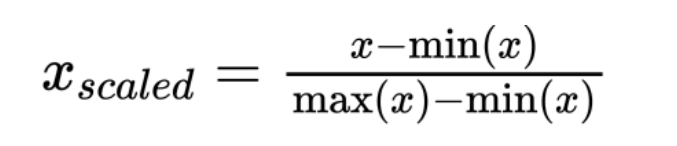

#### Playing with it 

In [24]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# use the iris dataset
X, y = load_iris(return_X_y=True)
print(X.shape)
# (150, 4) # 150 samples (rows) with 4 features/variables (columns)

# build the scaler model
scaler = MinMaxScaler()

# fit using the train set
scaler.fit(X)

# transform the test test
X_scaled = scaler.transform(X)
# print(X_scaled)

# Verify minimum value of all features
X_scaled.min(axis=0)
# array([0., 0., 0., 0.])

# Verify maximum value of all features
X_scaled.max(axis=0)
# array([1., 1., 1., 1.])

# Manually normalise without using scikit-learn
X_manual_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# print(X_manual_scaled)


# Verify manually VS scikit-learn estimation
print(np.allclose(X_scaled, X_manual_scaled))
#True

(150, 4)
True


In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### visualising the difference 

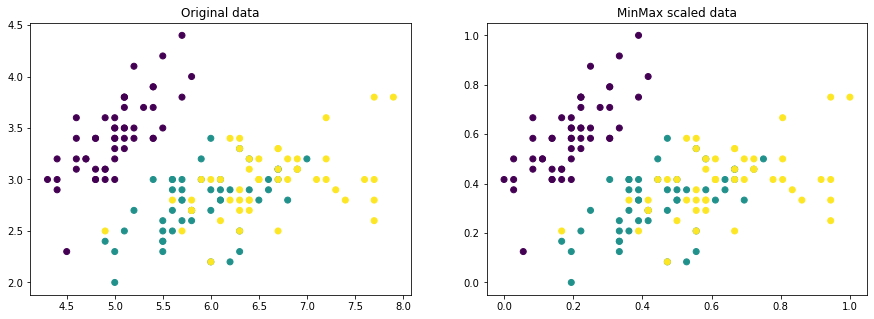

the values of the features are within the range [0,1] following the Min-Max scaling


In [41]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2,figsize = (15,5))
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_title("Original data")
axes[1].scatter(X_scaled[:,0], X_scaled[:,1], c=y)
axes[1].set_title("MinMax scaled data")
plt.show()
print('the values of the features are within the range [0,1] following the Min-Max scaling')

In [42]:
# sns.distplot(X_manual_scaled)

In [43]:
# sns.distplot(X)

#### summary 

- One important thing to keep in mind when using the MinMax Scaling is that it is highly influenced by the maximum and minimum values in our data so if our data contains outliers it is going to be biased.

- MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]. This is done feature-wise in an independent way.

- The MinMaxScaler scaling might compress all inliers in a narrow range.

#### How to deal with Outliers 

- Recommended way: Use the RobustScaler that will just scale the features but in this case using statistics that are robust to outliers. This scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).